<a href="https://colab.research.google.com/github/HeadHunter28/DNS_Attack_Detection_MajPro/blob/main/Batch_4_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DNS Attack Detection using Machine Learning

SyntaxError: invalid syntax (<ipython-input-1-eb230817b0bc>, line 1)

In [2]:
! pip install scikeras

### 1. Importing all necessary libraries

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [112]:
pd.set_option('display.max_rows', 100)  # Change 1000 to the desired number of rows
pd.set_option('display.max_columns', 100)  # Change 1000 to the desired number of columns


### 2. Loading the data

- ### 2.1. Loading column names explicitly :

In [5]:
with open("column.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [6]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


- #### 2.2 Loading 'Types of Attack' explicity :

In [7]:
with open("training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [8]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


- #### 2.3 Loading dataset file and assigning from explicity loaded labels

In [9]:
path = "DDoSDNSDataset.csv"

df = pd.read_csv(path,names=columns)


df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])


- #### 2.4 Peeking at the dataset :

In [10]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


- #### 2.5 Shape of dataset (rows, columns) :

In [11]:
df.shape

(494021, 43)

- #### 2.6 Checking the data types of columns :

In [12]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

- #### 2.7 Checking number of null values for each column :

In [13]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

- #### 2.8 Checking the count of different unique values of 'target' column :

In [14]:
df['target'].value_counts()

target
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

- #### 2.9 Checking the count of different unique values of 'Attack type' column :

In [15]:
df['Attack Type'].value_counts()

Attack Type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

- #### 2.10 Separating NUMERICAL and CATEGORICAL columns :

In [16]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'service', 'flag']

- #### ! Defining helper function for data visualization :

In [17]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

---

### 3. Data wrangling , visualisation and examination

- #### 3.1 Visualising the different protocol types

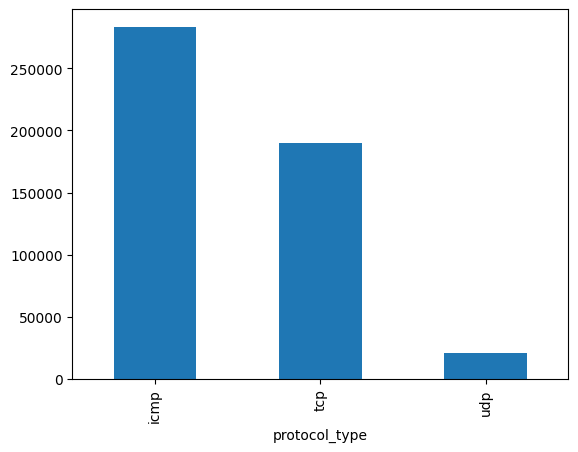

In [ ]:
bar_graph('protocol_type')

- #### 3.2 Visualising the different services

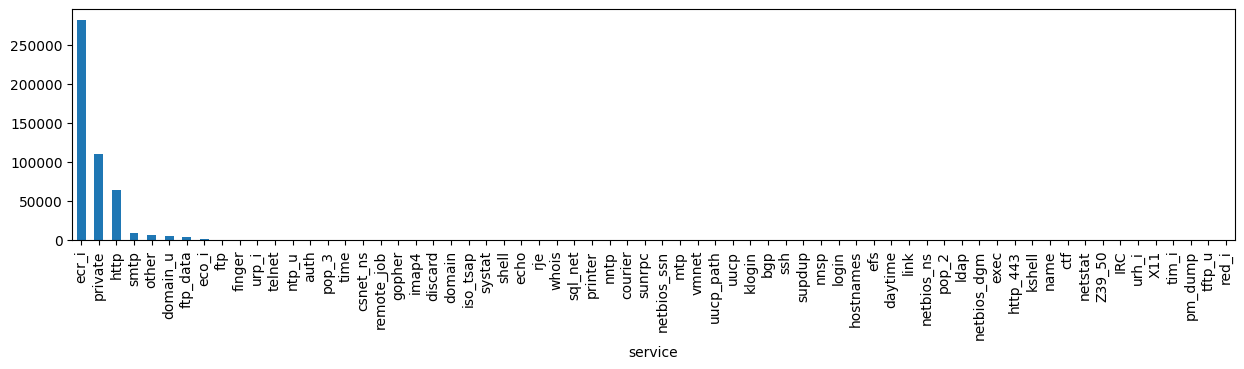

In [ ]:
plt.figure(figsize=(15,3))
bar_graph('service')

- #### 3.3 Visualising the different types of flags

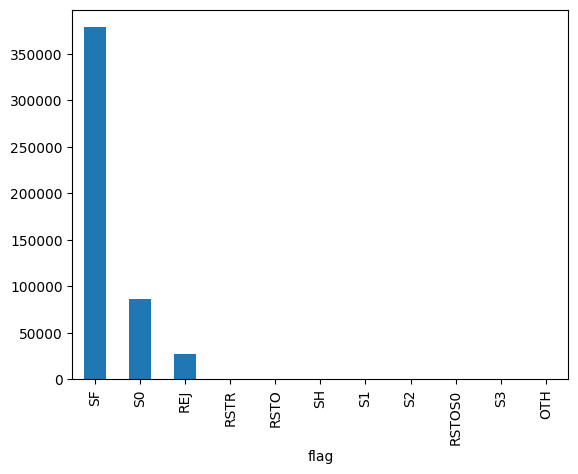

In [ ]:
bar_graph('flag')

- #### 3.4 Visualsing number of 'logged in'

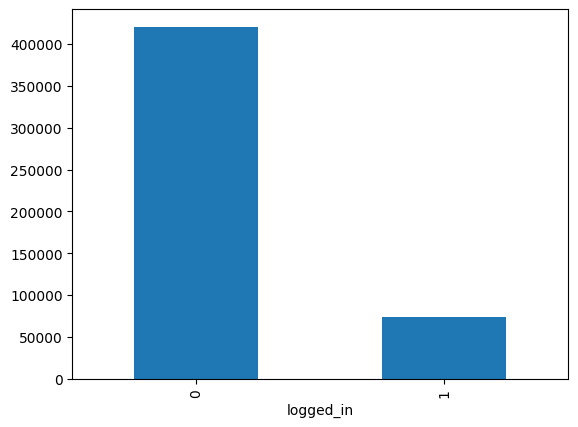

In [ ]:
bar_graph('logged_in')

- #### 3.5 Visualising number 'target' values

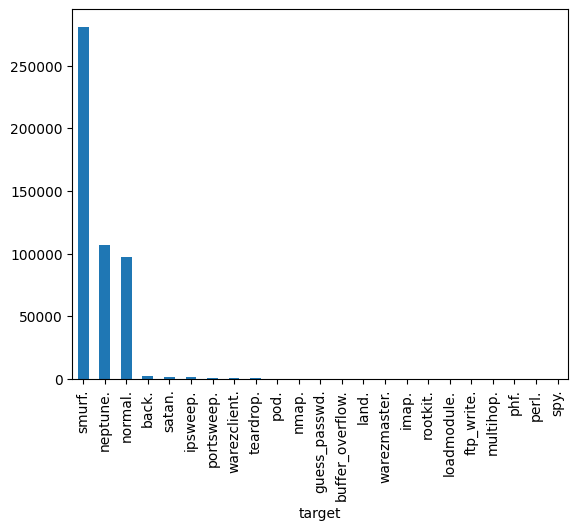

In [ ]:
bar_graph('target')

- #### 3.6 Visualising different values of 'Attack type'

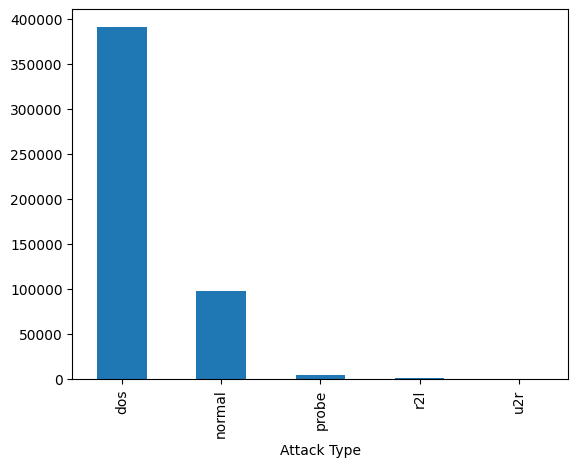

In [ ]:
bar_graph('Attack Type')

- #### 3.7 Checking all columns, and removing null values and redundant columns :

In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

In [21]:
df = df.dropna()

df = df[[col for col in df if df[col].nunique() > 1]]

- #### 3.8 Generating the correlation between columns :

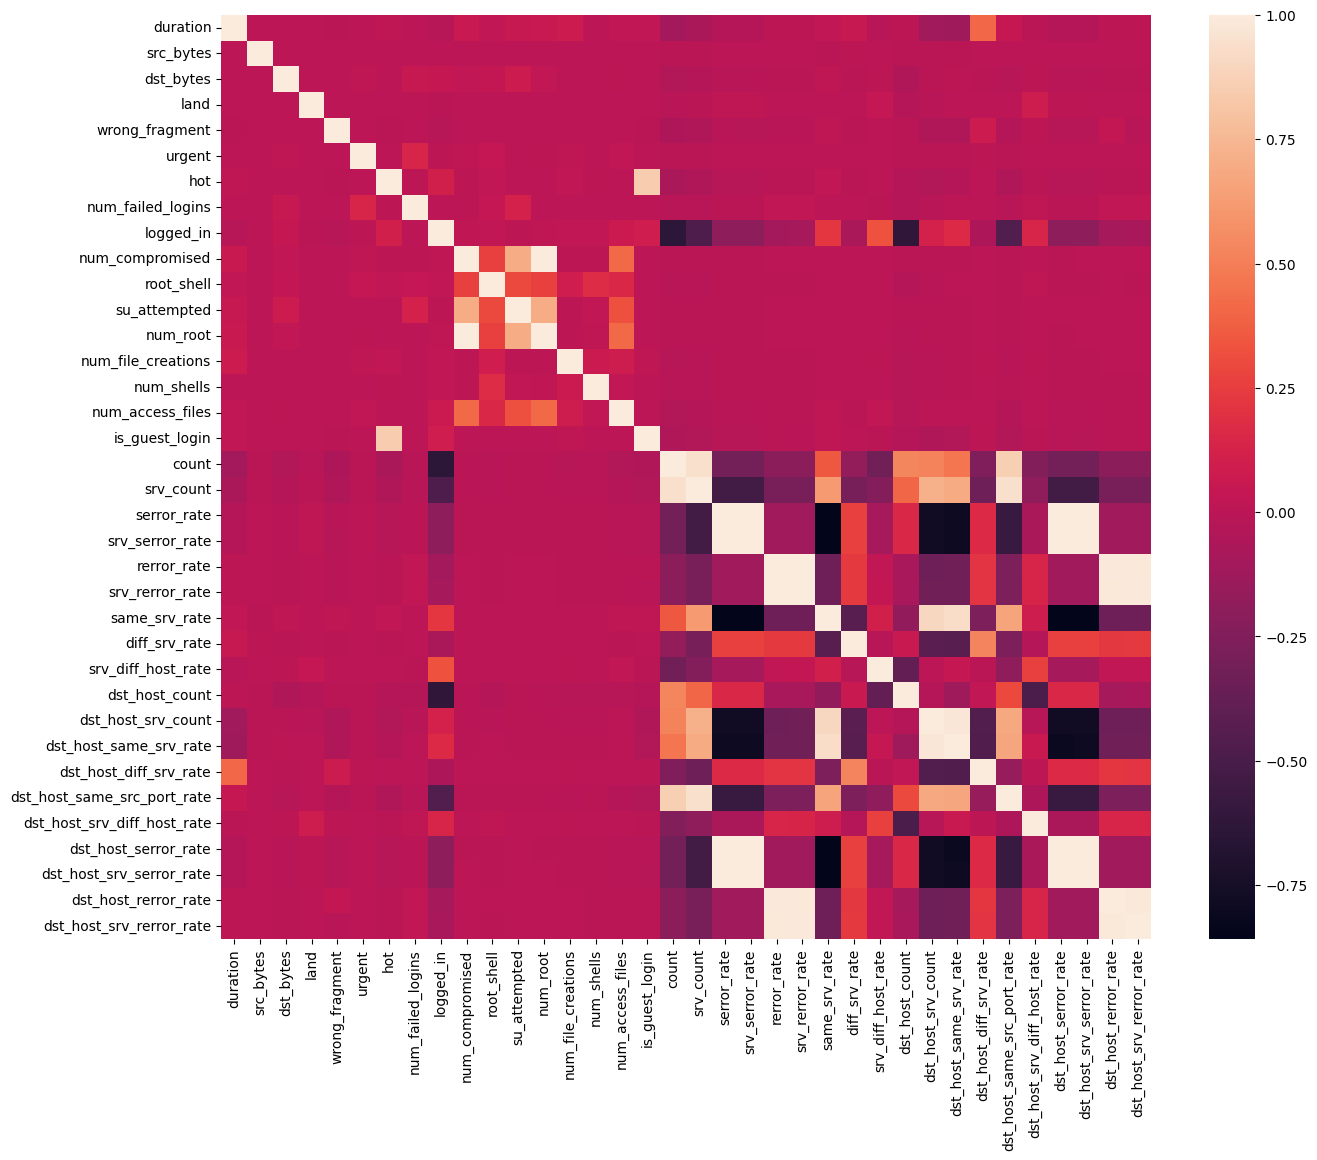

In [22]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

- #### 3.8.1 Individually checking correlations :

In [23]:
df['num_root'].corr(df['num_compromised'])

0.9938277978737916

In [24]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.998361507272553

In [25]:
df['srv_count'].corr(df['count'])

0.9436670688882645

In [26]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539818242

In [27]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572953835

In [28]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173373293

In [29]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110285

In [30]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9278080342690969

In [31]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630323716

In [32]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.944926367678324

In [33]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729680104371

In [34]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.9978353003739603

In [35]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.997849248567986

In [36]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.999304109185027

In [37]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.986994792495618

In [38]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308264

In [39]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751695

In [40]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845764

#### 3.9

#### All these columns/features are highly correlated with values around +9.8.

It would be beneficial to drop them from the dataset for :

1) Reducing multicollinearity
2) Reducing redundancy
3) Reducing Overfitting
4) Enhancing Interpretability


In [41]:
df.drop('num_root',axis = 1,inplace = True)
df.drop('srv_serror_rate',axis = 1,inplace = True)
df.drop('srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

- #### 3.10 Making a sorted copy of dataset :

In [44]:
df_std = df.std(numeric_only=True)
df_std = df_std.sort_values(ascending = True)
df_std

urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

- #### 3.11 Converting categories to numbers by making dictionaries and mapping with integer indexes (similar to encoding) :

    ! This step is essential to prepare dataset for use by ML/DL algorithms.

&rarr;     3.11.1 Converting Protocol types

In [45]:
df['protocol_type'].value_counts()

protocol_type
icmp    283602
tcp     190065
udp      20354
Name: count, dtype: int64

In [46]:
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

&rarr; Converting Flag types

In [47]:
df['flag'].value_counts()

flag
SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: count, dtype: int64

In [48]:
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

&rarr; Dropping 'service' column

 The feature has large number of categories with imbalanced values, encoding for which will not prove fruitful.

In [49]:
df.drop('service',axis = 1,inplace= True)

<br>

- #### 3.12 Dividing the input and output (target variables)

    Target variable : Attack Type

In [50]:
df = df.drop(['target',], axis=1)
print(df.shape)

(494021, 31)


In [51]:
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)


- #### 3.13 Standardizing and scaling the values

  Done using the MinMaxScaler() on the data

In [52]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

- #### 3.14 Splitting the dataset into training and testing set



In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [54]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


----

### 4. Model Selection and training

- We will <b>instantiate</b> a set of traditional ML models and a set of deep learning neural networks.

- To track model performance, we will make a dataframe to track training/testing time, accuracy and score.

- First, we will begin with statistical and probabilistic models, then move on to neural networks.

<br>
- Making a dataframe statmod_metrics to track model performance :

In [89]:
columns1 = ['Method','Train Accuracy','Test Accuracy','Training Time','Testing Time','Precision']
dtypes1 = {'Method': str, 'Train Accuracy': float, 'Test Accuracy': float,'Training Time':float,'Testing Time':float,'Precision':float}


statmod_metrics = pd.DataFrame(columns=columns1)

for col, dtype in dtypes1.items():
    statmod_metrics[col] = statmod_metrics[col].astype(dtype)



In [90]:
statmod_metrics.dtypes

Method             object
Train Accuracy    float64
Test Accuracy     float64
Training Time     float64
Testing Time      float64
Precision         float64
dtype: object

## Defining helper functions :

- Trains and tests a model on the data.

- Stores performance metrics to our dataframe

In [91]:
#for statistical models
def run_model(model,name,xtr,ytr,xte,yte,dfx):

    start_time = time.time()

    model.fit(xtr,ytr.values.ravel())

    end_time = time.time()

    training_time = end_time - start_time

    start_time1 = time.time()

    y_pred=model.predict(xte)

    end_time1 = time.time ()

    testing_time = end_time1-start_time1

    train_accuracy = model.score(xtr,ytr)

    test_accuracy = model.score(xte,yte)

    precision = precision_score(yte, y_pred, average='weighted')

    #print(precision)



    # Inserting all recorded metrics to our dataframe
    new_row = {'Method': name, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy,'Training Time':training_time,'Testing Time':testing_time,'Precision':precision}
    dfx = dfx._append(new_row, ignore_index=True)
    return dfx




-  ### 4.1 Gaussian Naive Bayes

In [92]:
gnb = GaussianNB()
name_gnb='Gaussian Naive Bayes'

In [93]:
statmod_metrics=run_model(gnb,name_gnb,X_train,Y_train,X_test,Y_test,statmod_metrics)

- ### 4.2 Decision Tree Classifier

In [95]:
dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
name_dectree = 'Decision Tree Classifier'

In [96]:
statmod_metrics=run_model(dec_tree,name_dectree,X_train,Y_train,X_test,Y_test,statmod_metrics)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- ### 4.3 Random Forest Classifier

In [98]:
rnfc = RandomForestClassifier(n_estimators=30)
name_rnf = 'Random Forest Classifier'

In [99]:
statmod_metrics=run_model(rnfc,name_rnf,X_train,Y_train,X_test,Y_test,statmod_metrics)

- ### 4.4 Support Vector Classifier

In [100]:
svcm = SVC(gamma = 'scale')
name_svc = 'Support Vector Classifier'

In [101]:
statmod_metrics=run_model(svcm,name_svc,X_train,Y_train,X_test,Y_test,statmod_metrics)

- ### 4.5 Logistic Regression

In [102]:
log_reg = LogisticRegression(max_iter=1200000)
name_lreg = 'Logistic Regression'

In [103]:
statmod_metrics=run_model(log_reg,name_lreg,X_train,Y_train,X_test,Y_test,statmod_metrics)

- ### 4.6 Gradient Boosting Classifier

In [104]:
gbc = GradientBoostingClassifier(random_state=0)
name_gbc = 'Gradient Boosting '

In [105]:
statmod_metrics=run_model(gbc,name_gbc,X_train,Y_train,X_test,Y_test,statmod_metrics)

In [106]:
statmod_metrics.head(6)

,Method,Train Accuracy,Test Accuracy,Training Time,Testing Time,Precision
0,Gaussian Naive Bayes,0.879511,0.879038,0.646041,0.240698,0.966479
1,Decision Tree Classifier,0.990583,0.990523,1.785276,0.015888,0.990204
2,Random Forest Classifier,0.999979,0.999644,9.630461,0.299757,0.999641
3,Support Vector Classifier,0.998755,0.998792,174.219209,66.594274,0.998782
4,Logistic Regression,0.993504,0.993480,8.441094,0.025799,0.993573
5,Gradient Boosting,0.997930,0.997718,406.654238,1.095271,0.997919


#### We have noticeably achieved a high very high accuracy and precision across all models.

- ### 4.7 Aritificial Neural Network

#### Features :

&rarr; The input shape : 30

&rarr; The output shape : 5 (There are five possible categories)

&rarr; Layer 1 ( Input Layer; 30 nodes ; ReLU activation function)

&rarr; Layer 2 (Hidden Layer; 1 nodes; Sigmoid activation function)

&rarr; Layer 3 (Output Layer ; 5 nodes ; Softmax function)

&rarr; The loss function 'Categorical Cross entropy' is used, typical for classfication problems.

&rarr; Batch size : 64



In [58]:
def create_model():
    model = Sequential([
        Dense(30,input_dim =30,activation = 'relu',kernel_initializer='random_uniform'),
        Dense(1,activation='sigmoid',kernel_initializer='random_uniform'),
        Dense(5,activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

- #### Instantiating the classifier :

In [59]:
annC = KerasClassifier(build_fn=create_model,epochs=100,batch_size=64)

- #### Fitting the model for 100 epochs :

In [60]:
startx = time.time()

annC.fit(X_train, Y_train.values.ravel())

history = annC.history_

endx = time.time()

train_timeX= endx-startx

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5172/5172 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8999 - loss: 0.7239
Epoch 2/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9840 - loss: 0.0912
Epoch 3/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9843 - loss: 0.0712
Epoch 4/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9845 - loss: 0.0674
Epoch 5/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9847 - loss: 0.0651
Epoch 6/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9847 - loss: 0.0638
Epoch 7/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9849 - loss: 0.0619
Epoch 8/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9849 - loss: 0.0550
Epoch 9/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9876 - loss: 0.0407
Epoch 10/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9891 - loss: 0.0319
Epoch 11/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9913 - loss: 0.0267
Epoch 12/100
5172/5172 ━━━

- #### Visualising the network's performance wrt loss function over the epochs :

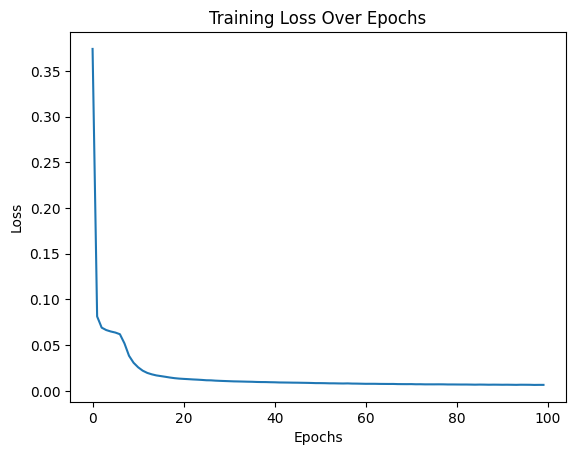

In [63]:
plt.plot(history['loss'])
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

We can observe the training loss goes down very fast, becoming 0 at the 60-80th epoch.

<br>

- #### Making predictions :

In [64]:
startx1 = time.time()
Y_test_pred7 = annC.predict(X_test)
endx1 = time.time()
test_timex1=endx1-startx1

2548/2548 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [65]:
# Generating training predictions
Y_train_pred7 = annC.predict(X_train)


5172/5172 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


- #### Checking the network's performance :

In [85]:
tra_scorex1=accuracy_score(Y_train,Y_train_pred7)
print("Training scores:",tra_scorex1)

Training scores: 0.9991570844184486


In [84]:
test_scorex1=accuracy_score(Y_test,Y_test_pred7)
print("Testing accuracy:",test_scorex1)

Testing accuracy: 0.9988345488784066


In [87]:
precision1 = precision_score(Y_test,Y_test_pred7, average='weighted')
print(precision1)

0.9987258568816139


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [88]:
new_row1 = {'Method': 'Neural Network', 'Train Accuracy': tra_scorex1, 'Test Accuracy': test_scorex1,'Training Time':train_timeX,'Testing Time':test_timex1,'Precision':precision1}

In [107]:
statmod_metrics = statmod_metrics._append(new_row1, ignore_index=True)

In [114]:
statmod_metrics.head(8)

,Method,Train Accuracy,Test Accuracy,Training Time,Testing Time,Precision
0,Gaussian Naive Bayes,0.879511,0.879038,0.646041,0.240698,0.966479
1,Decision Tree Classifier,0.990583,0.990523,1.785276,0.015888,0.990204
2,Random Forest Classifier,0.999979,0.999644,9.630461,0.299757,0.999641
3,Support Vector Classifier,0.998755,0.998792,174.219209,66.594274,0.998782
4,Logistic Regression,0.993504,0.993480,8.441094,0.025799,0.993573
5,Gradient Boosting,0.997930,0.997718,406.654238,1.095271,0.997919
6,Neural Network,0.999157,0.998835,992.465198,4.399953,0.998726


## Visualisations :

1. Plotting for Training accuracy

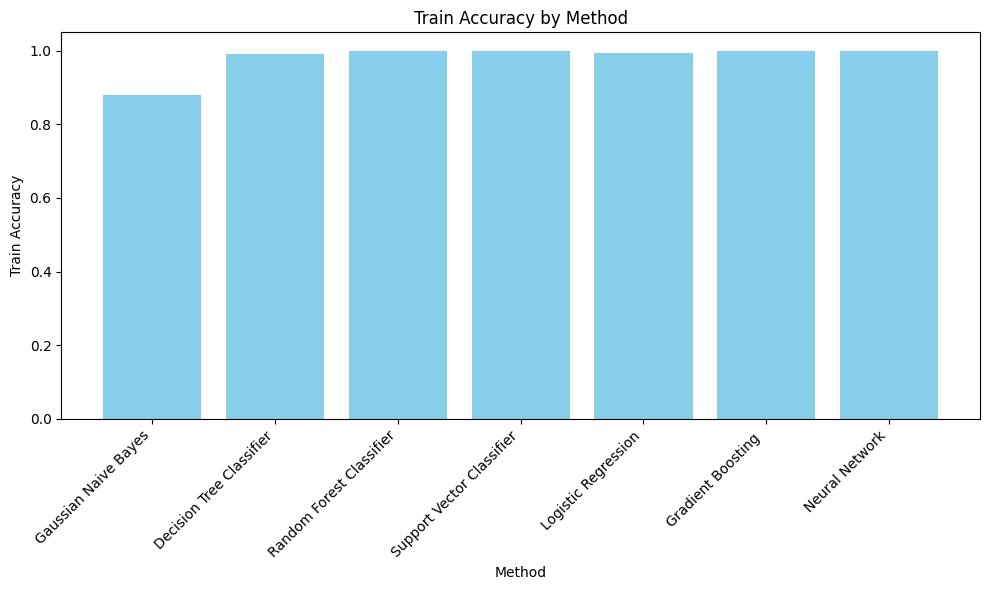

In [130]:
methods = statmod_metrics['Method']
train_accuracy = statmod_metrics['Train Accuracy']

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(methods, train_accuracy, color='skyblue')

# Adding labels and title
plt.xlabel('Method')
plt.ylabel('Train Accuracy')
plt.title('Train Accuracy by Method')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.savefig('train_acc.png')
# Displaying the plot
plt.show()


2. Plotting for testing accuracy

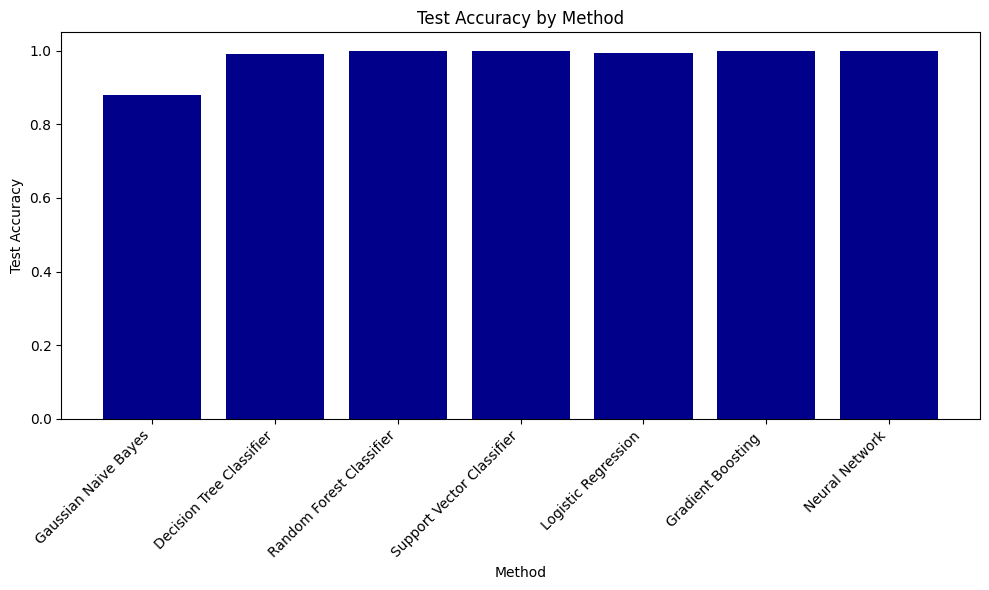

In [132]:
test_accuracy = statmod_metrics['Test Accuracy']
# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(methods, test_accuracy, color='darkblue')

# Adding labels and title
plt.xlabel('Method')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy by Method')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.savefig('test_acc.png')
# Displaying the plot
plt.show()

3. Plotting for training time

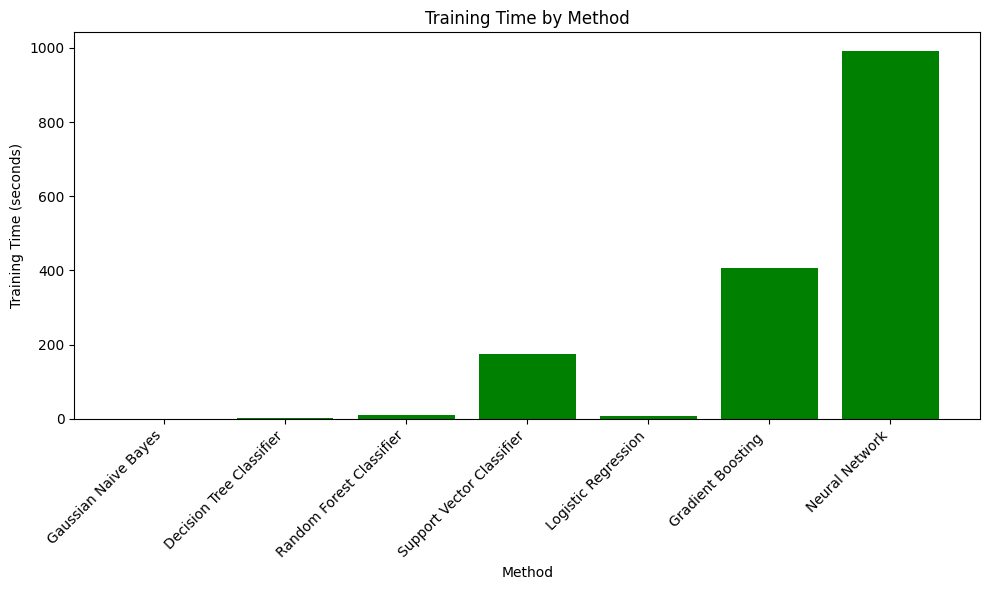

In [133]:
tra_time = statmod_metrics['Training Time']
# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(methods, tra_time, color='green')

# Adding labels and title
plt.xlabel('Method')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time by Method')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.savefig('train_time.png')
# Displaying the plot
plt.show()

4. Plotting for Testing time

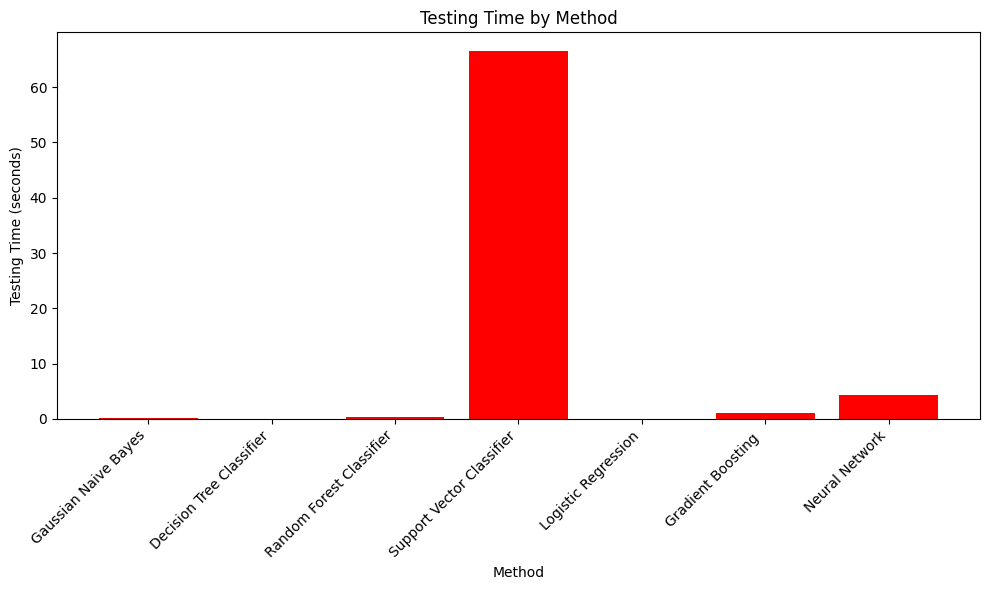

In [134]:
tes_time = statmod_metrics['Testing Time']
# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(methods, tes_time, color='red')

# Adding labels and title
plt.xlabel('Method')
plt.ylabel('Testing Time (seconds)')
plt.title('Testing Time by Method')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.savefig('testtime.png')
# Displaying the plot
plt.show()